In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('klocality_with_age-sex.csv')
df.head()

,id,sex,age,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,NDARED632KNG,1,17.203855,260,475,402,479,34,427,260,...,9,297,13,297,9,262,13,297,10,262
1,NDARFM080VAF,1,7.623203,134,396,35,311,273,404,269,...,12,320,13,218,10,218,9,199,9,218
2,NDARFW130NGG,1,8.316107,197,418,295,418,41,371,288,...,10,154,14,228,10,154,10,154,18,260
3,NDARHP656DLC,0,10.936459,148,322,35,232,182,322,120,...,6,153,9,153,16,156,9,156,6,16
4,NDARDR658DRA,0,6.421857,233,456,142,452,31,440,366,...,13,187,13,247,16,247,10,187,10,187


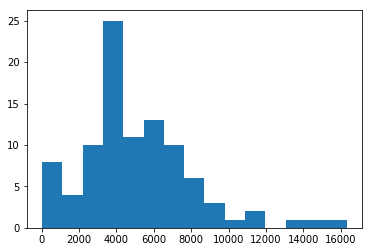

In [3]:
plt.hist([df[col].var() for col in df.columns[3:]], bins=15)
plt.show()    

In [25]:
pca = PCA(n_components=10).fit(df[df.columns[3:]])

In [26]:
pca.explained_variance_ratio_

array([0.4605544 , 0.05299993, 0.03972849, 0.03509351, 0.02980133,
       0.02591051, 0.02306426, 0.02177449, 0.02119065, 0.01912112])

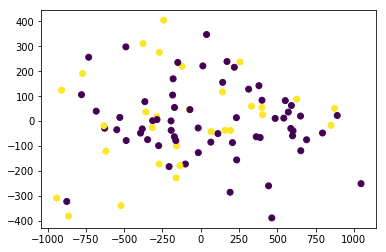

In [27]:
plt.scatter([x[0] for x in X], 
            [x[1] for x in X],
            c=list(df['sex']))
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[df.columns[3:]])
accuracy_score(np.array(df['sex']), kmeans.labels_)

0.5494505494505495

In [8]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import KFold

In [61]:
kf = KFold(n_splits=5)
clf = RandomForestClassifier()

In [62]:
df_data = df[df.columns[3:]]
labels = df['sex']

acc = []

for train, test in kf.split(df):
    
    # Split into train/test sets
    X_train, y_train, X_test, y_test = df_data.iloc[train], labels.iloc[train], df_data.iloc[test], labels.iloc[test]

    # Fit training data to model and predict test cases
    y_pred = clf.fit(X_train, y_train).predict(X_test)

    # Score the prediction
    acc.append(accuracy_score(y_test, y_pred))

In [63]:
np.mean(acc)

0.6812865497076024

In [64]:
acc

[0.6842105263157895,
 0.8333333333333334,
 0.7777777777777778,
 0.5,
 0.6111111111111112]